# Prediction of House Price

## load the dataset

In [2]:
import tensorflow

In [4]:
from tensorflow.keras.datasets import boston_housing

In [18]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [19]:
train_data.shape

(404, 13)

In [20]:
test_data.shape

(102, 13)

In [21]:
train_data.std() # just to check

144.39194712410696

## normalizing the data

In [22]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

In [23]:
train_data -= mean

In [24]:
train_data /= std

In [25]:
test_data -= mean

In [26]:
test_data /= std

In [28]:
train_data.std() # after normalizing the data

0.9999999999999993

## build the neural network model

In [268]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [269]:
network = models.Sequential()

In [270]:
network.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(1))
network.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## Use K-fold validation

In [292]:
import numpy as np

In [293]:
k = 4

In [294]:
val_sample_size = len(train_data)//k

In [295]:
all_scores = []
for i in range(k):
    val_data = train_data[i*val_sample_size: (i+1)*val_sample_size]
    val_targets = train_targets[i*val_sample_size: (i+1)*val_sample_size]
    partial_train_data = np.concatenate([train_data[:i*val_sample_size], train_data[(i+1)*val_sample_size:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*val_sample_size], train_targets[(i+1)*val_sample_size:]], axis=0)
    
    network.fit(partial_train_data, partial_train_targets, epochs=100, batch_size=1, verbose=0)
    val_mse, val_mae = network.evaluate(val_data, val_targets,verbose=0)
    all_scores.append(val_mae)

In [296]:
all_scores

[1.1834250901005057,
 1.0508086226954318,
 1.0621395288127484,
 0.8639742206818987]

In [297]:
np.mean(all_scores)

1.040086865572646

In [91]:
# lets make the epoch size bigger, say 500

In [298]:
model = models.Sequential()

In [299]:
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [300]:
import matplotlib.pyplot as plt

In [301]:
all_mae_histories = []
for i in range(k):
    val_data = train_data[i*val_sample_size: (i+1)*val_sample_size]
    val_targets = train_targets[i*val_sample_size: (i+1)*val_sample_size]
    partial_train_data = np.concatenate([train_data[:i*val_sample_size], train_data[(i+1)*val_sample_size:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*val_sample_size], train_targets[(i+1)*val_sample_size:]], axis=0)
    
    model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=500, batch_size=1, verbose=0)
    mae_history  = model.history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

In [302]:
model.history.history.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])

In [303]:
avg_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(500)]

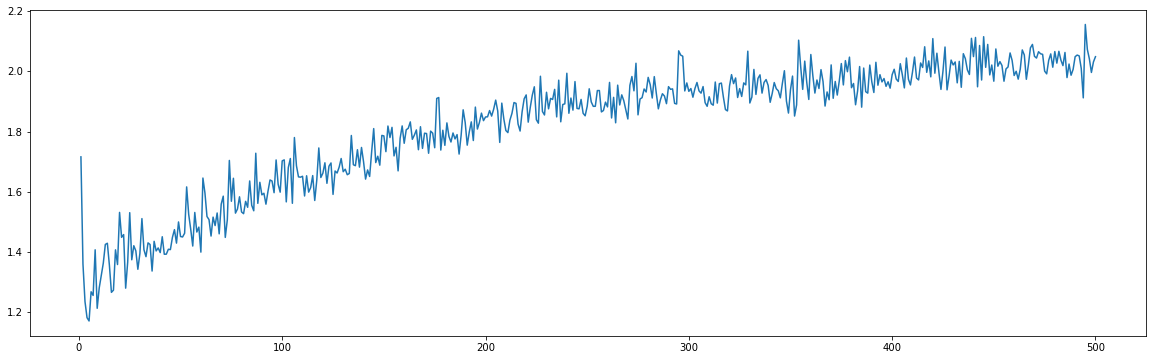

In [304]:
plt.plot(range(1, len(avg_mae_history)+1), avg_mae_history)
fig=plt.gcf()
fig.set_size_inches(20,6)

In [305]:
def smooth_curve(points, factor=0.9):
    smoothed_points = [] 
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point) 
    return smoothed_points

In [306]:
hist = smooth_curve(avg_mae_history)

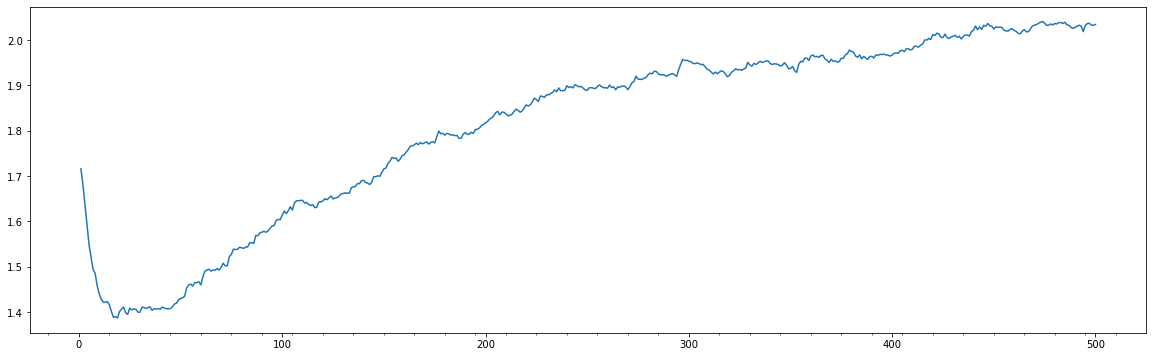

In [330]:
plt.plot(range(1, len(avg_mae_history)+1), hist)
ax = plt.gca()
ax.xaxis.set_minor_locator(plt.MultipleLocator(15))
fig=plt.gcf()
fig.set_size_inches(20,6)

## build the final model

In [325]:
model_final = models.Sequential()

In [379]:
model_final.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model_final.add(layers.Dense(64, activation='relu'))
model_final.add(layers.Dense(1))
model_final.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [389]:
model_final.fit(train_data, train_targets, epochs=15, batch_size=16, verbose=0)

In [390]:
test_mse_score, test_mae_score = model_final.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 49us/step


In [391]:
test_mae_score # the prediction is off by 2300$

2.3801214554730583